<a href="https://colab.research.google.com/github/ghizlane89/0__GenIA/blob/Bootcamp/W5_D5_MiniProjet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow matplotlib

Étape 1 : Prétraitement des données

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

# 1. Charger le dataset (les 10 000 mots les plus fréquents)
vocab_size = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

# 2. Vectorisation one-hot
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# 3. Convertir les labels en float32
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# 4. Séparer un jeu de validation (10 000 premières données)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Étape 2 : Créer le modèle

In [3]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(vocab_size,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Étape 3 : Entraîner le modèle (20 époques)

In [4]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)


Epoch 1/20
30/30 - 3s - 109ms/step - accuracy: 0.7717 - loss: 0.5465 - val_accuracy: 0.8618 - val_loss: 0.4135
Epoch 2/20
30/30 - 1s - 36ms/step - accuracy: 0.8917 - loss: 0.3397 - val_accuracy: 0.8762 - val_loss: 0.3287
Epoch 3/20
30/30 - 2s - 59ms/step - accuracy: 0.9169 - loss: 0.2562 - val_accuracy: 0.8883 - val_loss: 0.2875
Epoch 4/20
30/30 - 2s - 70ms/step - accuracy: 0.9320 - loss: 0.2044 - val_accuracy: 0.8878 - val_loss: 0.2756
Epoch 5/20
30/30 - 2s - 66ms/step - accuracy: 0.9459 - loss: 0.1693 - val_accuracy: 0.8766 - val_loss: 0.3004
Epoch 6/20
30/30 - 2s - 62ms/step - accuracy: 0.9536 - loss: 0.1456 - val_accuracy: 0.8862 - val_loss: 0.2817
Epoch 7/20
30/30 - 1s - 33ms/step - accuracy: 0.9606 - loss: 0.1259 - val_accuracy: 0.8737 - val_loss: 0.3182
Epoch 8/20
30/30 - 2s - 53ms/step - accuracy: 0.9688 - loss: 0.1068 - val_accuracy: 0.8796 - val_loss: 0.3088
Epoch 9/20
30/30 - 3s - 94ms/step - accuracy: 0.9727 - loss: 0.0957 - val_accuracy: 0.8813 - val_loss: 0.3168
Epoch 10/

Étape 4 : Visualiser les courbes (loss et accuracy)

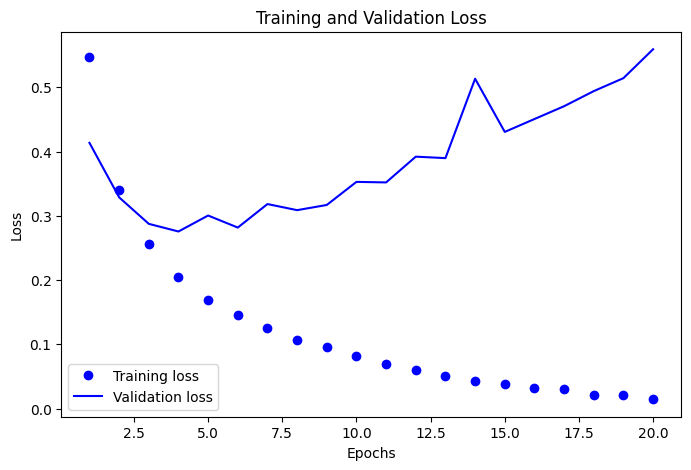

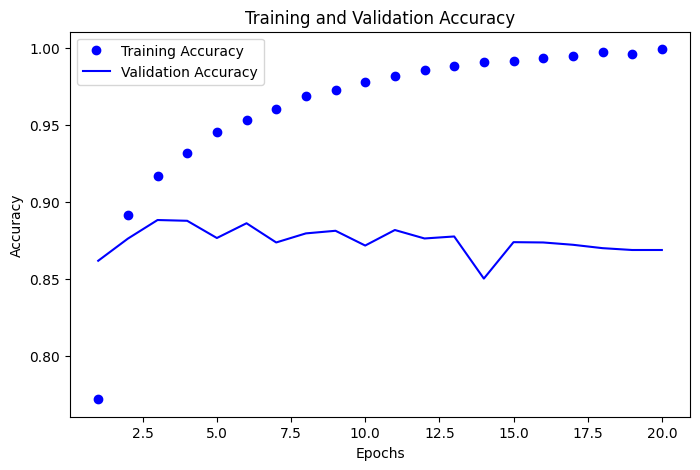

In [5]:
# Récupération des données d’historique
history_dict = history.history
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(loss) + 1)

# Courbe des pertes
plt.figure(figsize=(8,5))
plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Courbe de précision
plt.figure(figsize=(8,5))
plt.plot(epochs, acc, 'bo', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Étape 5 : Réentraîner avec le bon nombre d’époques

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(vocab_size,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512, verbose=2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
49/49 - 3s - 53ms/step - accuracy: 0.8098 - loss: 0.4639
Epoch 2/4
49/49 - 2s - 31ms/step - accuracy: 0.9035 - loss: 0.2702
Epoch 3/4
49/49 - 2s - 33ms/step - accuracy: 0.9228 - loss: 0.2141
Epoch 4/4
49/49 - 2s - 51ms/step - accuracy: 0.9350 - loss: 0.1833


Étape 6 : Évaluer le modèle final sur les données de test

In [7]:
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]:.4f} - Test Accuracy: {results[1]:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8785 - loss: 0.2982
Test Loss: 0.2985 - Test Accuracy: 0.8800


In [ ]:
Étape 7 : Analyse & Conclusion

In [ ]:
Dans ce projet, nous avons entraîné un réseau de neurones pour classifier des critiques de films comme positives ou négatives.
Après visualisation des courbes, nous avons identifié un sur-apprentissage (overfitting) après 4 epoch ( val_loss qui augmente alors que loss a diminué).
En limitant l’entraînement à 4 époques, le modèle a atteint une précision d’environ 87 à 88 % sur les données de test.

